In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [2]:
df=pd.read_csv('weighted_inflated_data_0322.csv')

/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (141) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.shape

(265860, 385)

In [4]:
print('Top 1% net worth')
df_1 = df[df.ONE_PERC==1]
df_1.own_investment_real_estate.value_counts()

Top 1% net worth


0    20323
1    15038
Name: own_investment_real_estate, dtype: int64

In [5]:
df_11989=df_1[df_1.year==1989]

In [6]:
df_11989.shape

(2056, 385)

In [7]:
from pandas._libs.lib import is_integer

def weighted_qcut(values, weights, q, **kwargs):
    'Return weighted quantile cuts from a given series, values.'
    if is_integer(q):
        quantiles = np.linspace(0, 1, q + 1)
    else:
        quantiles = q
    order = weights.iloc[values.argsort()].cumsum()
    bins = pd.cut(order / order.iloc[-1], quantiles, **kwargs)
    return bins.sort_index()

In [8]:
df['resedential_estate_perc'] = weighted_qcut(df.total_real_estate, df.WGT, 100, labels=False)

In [9]:
import weightedstats as ws

In [10]:
ws.numpy_weighted_median(df_1[df_1.resedential_estate_perc<99].total_real_estate, 
                         weights=df_1[df_1.resedential_estate_perc<99].WGT)

AttributeError: 'DataFrame' object has no attribute 'resedential_estate_perc'

In [11]:
df['investment_estate_perc'] = weighted_qcut(df.real_estate_investment, df.WGT, 100, labels=False)

In [12]:
df['investment_estate_equity_perc'] = weighted_qcut(df.NNRESRE, df.WGT, 100, labels=False)

In [13]:
df.NNRESRE[df['investment_estate_equity_perc']==99].min()

522001.35021000006

In [14]:
df[(df['investment_estate_perc']==99)&(df.resedential_estate_perc==99)].WGT.sum()

2722890.871949201

In [15]:
(df[(df['investment_estate_perc']==99)&(df.resedential_estate_perc==99)&
    (df.ONE_PERC==1)].WGT.sum())/df_1.WGT.sum()

0.11367938400650233

In [16]:
(df[(df['investment_estate_perc']==99)&(df.resedential_estate_perc==99)&
    (df.resedential_estate_perc==99)&(df.ONE_PERC==1)].WGT.sum())/df_1.WGT.sum()

0.11367938400650233

In [17]:
df_1.NETWORTH.min()

4105514.9669

In [18]:
df.real_estate_investment[df['investment_estate_perc']==99].min()

78418.33682260827

In [19]:
df.total_real_estate[df.resedential_estate_perc==99].min()

2073966.24475

In [20]:
df.to_csv('/Users/guanlxy/Desktop/Capstone_Nelson_wealth/data/sliced_data_0322.csv', index = False)

# how is top1% w/wo investment property different

In [47]:
print('Top 1% net worth')
df_1 = df[df.ONE_PERC==1]
df_1.own_investment_real_estate.value_counts()

Top 1% net worth


0    20323
1    15038
Name: own_investment_real_estate, dtype: int64

In [48]:
df10 = df_1[df_1.own_investment_real_estate==0]
df11 = df_1[df_1.own_investment_real_estate==1]

In [49]:
df_1.columns.to_list()

['year',
 'x103',
 'x8021',
 'x1701',
 'x2001',
 'x2002',
 'x2003',
 'x2004',
 'x2010',
 'x2005',
 'x2006',
 'x2007',
 'x2008',
 'x2012',
 'x2013',
 'x2015',
 'x2016',
 'x2017',
 'x2018',
 'xx1',
 'x1',
 'y1',
 'yy1',
 'Unnamed: 0',
 'X1',
 'XX1',
 'WGT',
 'HHSEX',
 'AGE',
 'AGECL',
 'EDUC',
 'EDCL',
 'MARRIED',
 'KIDS',
 'LF',
 'LIFECL',
 'FAMSTRUCT',
 'RACECL',
 'RACECL4',
 'RACE',
 'OCCAT1',
 'OCCAT2',
 'INDCAT',
 'FOODHOME',
 'FOODAWAY',
 'FOODDELV',
 'RENT',
 'INCOME',
 'WAGEINC',
 'BUSSEFARMINC',
 'INTDIVINC',
 'KGINC',
 'SSRETINC',
 'TRANSFOTHINC',
 'PENACCTWD',
 'NORMINC',
 'SAVRES1',
 'SAVRES2',
 'SAVRES3',
 'SAVRES4',
 'SAVRES5',
 'SAVRES6',
 'SAVRES7',
 'SAVRES8',
 'SAVRES9',
 'LATE',
 'LATE60',
 'HPAYDAY',
 'BNKRUPLAST5',
 'KNOWL',
 'YESFINRISK',
 'NOFINRISK',
 'CRDAPP',
 'TURNDOWN',
 'FEARDENIAL',
 'TURNFEAR',
 'FORECLLAST5',
 'EMERGBORR',
 'EMERGSAV',
 'EMERGCUT',
 'HBORRFF',
 'HBORRCC',
 'HBORRALT',
 'HBORRFIN',
 'HSAVFIN',
 'HSAVNFIN',
 'HPSTPPAY',
 'HPSTPLN',
 'HPSTPOT

In [24]:
df10.WGT.sum()

7225133.186102247

In [25]:
df10.AGECL.value_counts()

4    6222
3    4774
5    4514
6    2723
2    1808
1     282
Name: AGECL, dtype: int64

In [26]:
df11.WGT.sum()

4877717.80162366

In [59]:
df_edu = df_1.groupby('EDUC_CLEAN').WGT.sum()
df_edu

EDUC_CLEAN
Bachelor degree                     4.308506e+06
Doctorate or professional school    2.735069e+06
High school                         8.043213e+05
Master                              2.558955e+06
No Highschool Diploma               2.321604e+05
Some College but no degree          1.463839e+06
Name: WGT, dtype: float64

In [61]:
df_edu['Bachelor degree']/df_edu.sum()

0.3559910111629477

In [62]:
(df_edu['Doctorate or professional school']+df_edu['Master'])/df_edu.sum()

0.43741956932730625

In [65]:
(df_edu['High school']+df_edu['No Highschool Diploma']+df_edu['Some College but no degree'])/df_edu.sum()

0.20658941950974608

In [27]:
df_educ_10 = df10.groupby('EDUC_CLEAN')['WGT'].sum()
df_educ_11 = df11.groupby('EDUC_CLEAN')['WGT'].sum()

In [28]:
df_educ_10 

EDUC_CLEAN
Bachelor degree                     2.563160e+06
Doctorate or professional school    1.701097e+06
High school                         3.825197e+05
Master                              1.683806e+06
No Highschool Diploma               8.261829e+04
Some College but no degree          8.119326e+05
Name: WGT, dtype: float64

In [29]:
df_educ_11

EDUC_CLEAN
Bachelor degree                     1.745346e+06
Doctorate or professional school    1.033972e+06
High school                         4.218015e+05
Master                              8.751489e+05
No Highschool Diploma               1.495421e+05
Some College but no degree          6.519067e+05
Name: WGT, dtype: float64

In [30]:
df_educ = pd.merge(df_educ_10, df_educ_11,  how='inner', 
                       on = 'EDUC_CLEAN')

In [31]:
df_educ.WGT_x = round((df_educ.WGT_x/(df_educ.WGT_x.sum()))*100,2)
df_educ.WGT_y = round((df_educ.WGT_y/(df_educ.WGT_y.sum()))*100,2)
df_educ

WGT_x  WGT_y
EDUC_CLEAN                                    
Bachelor degree                   35.48  35.78
Doctorate or professional school  23.54  21.20
High school                        5.29   8.65
Master                            23.30  17.94
No Highschool Diploma              1.14   3.07
Some College but no degree        11.24  13.36

In [32]:
df_educ.rename(columns={"EDUC_CLEAN": "Education Level", "WGT_x":"Households Without Real Estate Investments",
                  "WGT_y":"Households With Real Estate Investments"},inplace=True)
df_educ

Households Without Real Estate Investments  \
EDUC_CLEAN                                                                     
Bachelor degree                                                        35.48   
Doctorate or professional school                                       23.54   
High school                                                             5.29   
Master                                                                 23.30   
No Highschool Diploma                                                   1.14   
Some College but no degree                                             11.24   

                                  Households With Real Estate Investments  
EDUC_CLEAN                                                                 
Bachelor degree                                                     35.78  
Doctorate or professional school                                    21.20  
High school                                                          8.65  
Master                                                              17.94  
No Highschool Diploma                                                3.07  
Some College but no degree                                          13.36

TypeError: 'list' object is not callable

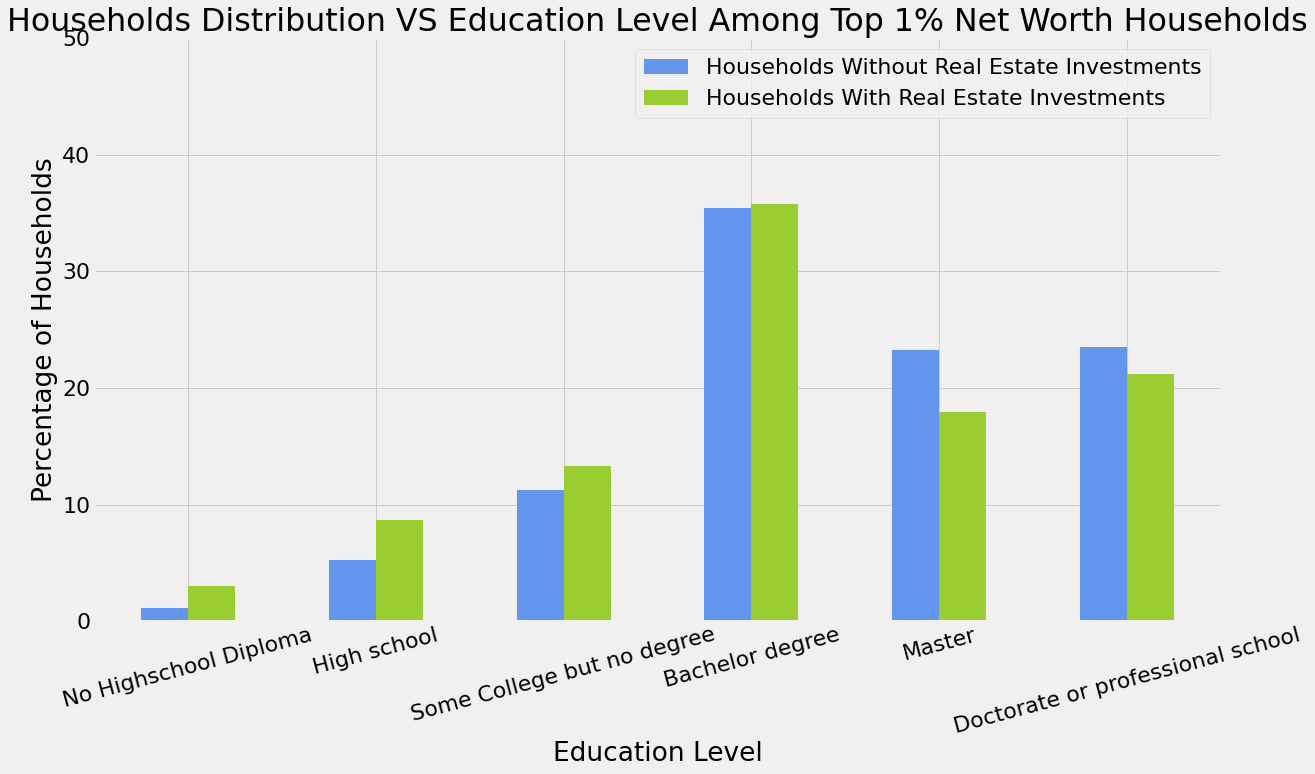

In [137]:
import matplotlib
matplotlib.style.use('fivethirtyeight')
matplotlib.rcParams.update({'font.size': 22})
edu_order = ['No Highschool Diploma', 'High school', 'Some College but no degree', 'Bachelor degree',
             'Master', 'Doctorate or professional school']
df_educ = df_educ.loc[edu_order]

df_educ.plot(kind='bar',title='Households Distribution VS Education Level Among Top 1% Net Worth Households',
             figsize=(18,10),xlabel='Education Level',ylabel="Percentage of Households", 
             color=['cornflowerblue','yellowgreen']).set_ylim(0, 50)
# plt.ylim(0,50)

plt.xticks(rotation=15, horizontalalignment="center")
plt.ylim([0, 40])

In [34]:
df_educc = df_educ.reset_index()
df_edut = df_educc.T
df_edut

0  \
EDUC_CLEAN                                  No Highschool Diploma   
Households Without Real Estate Investments                   1.14   
Households With Real Estate Investments                      3.07   

                                                      1  \
EDUC_CLEAN                                  High school   
Households Without Real Estate Investments         5.29   
Households With Real Estate Investments            8.65   

                                                                     2  \
EDUC_CLEAN                                  Some College but no degree   
Households Without Real Estate Investments                       11.24   
Households With Real Estate Investments                          13.36   

                                                          3       4  \
EDUC_CLEAN                                  Bachelor degree  Master   
Households Without Real Estate Investments            35.48    23.3   
Households With Real Estate Investments               35.78   17.94   

                                                                           5  
EDUC_CLEAN                                  Doctorate or professional school  
Households Without Real Estate Investments                             23.54  
Households With Real Estate Investments                                 21.2

In [35]:
df_educc

EDUC_CLEAN  \
0             No Highschool Diploma   
1                       High school   
2        Some College but no degree   
3                   Bachelor degree   
4                            Master   
5  Doctorate or professional school   

   Households Without Real Estate Investments  \
0                                        1.14   
1                                        5.29   
2                                       11.24   
3                                       35.48   
4                                       23.30   
5                                       23.54   

   Households With Real Estate Investments  
0                                     3.07  
1                                     8.65  
2                                    13.36  
3                                    35.78  
4                                    17.94  
5                                    21.20

In [36]:
x = ['Without Real Estate Investments', 'With Real Estate Investments']
y1 = np.array([1.14,3.07])
y2 = np.array([5.29,8.65])
y3 = np.array([11.24,13.36])
y4 = np.array([35.48,35.78])
y5 = np.array([23.30,17.94])
y6 = np.array([23.54,21.20])

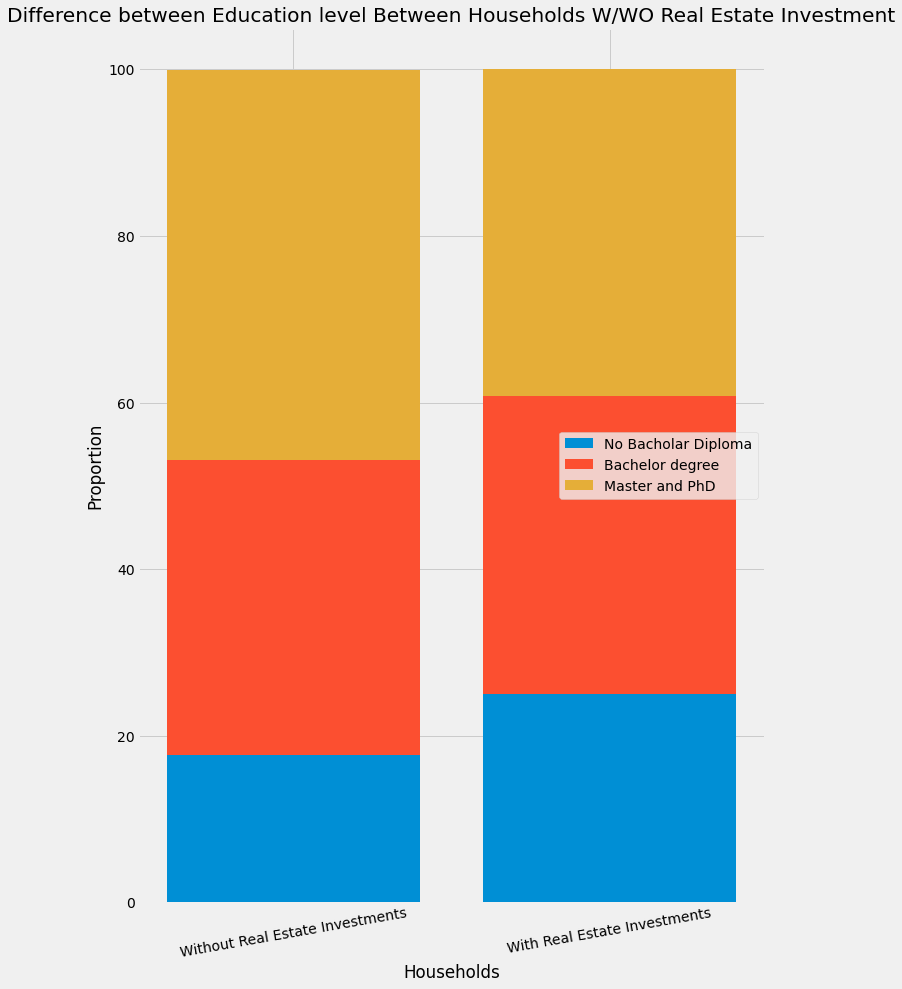

In [37]:
plt.figure(figsize=(10,15))
plt.title('Difference between Education level Between Households W/WO Real Estate Investment')
plt.xlabel('Households')
plt.ylabel('Proportion')
plt.bar(x, y1+y2+y3)
plt.bar(x, y4, bottom=y1+y2+y3)
plt.bar(x, y5+y6, bottom=y1+y2+y3+y4)
plt.ylim=([0,130])
plt.legend(['No Bacholar Diploma', 'Bachelor degree',
             'Master and PhD'],loc=5)
plt.xticks(rotation=10, horizontalalignment="center")
plt.show()

In [38]:
y=['With Investment', 'Without Real Estate Investment']
below_ba = [17, 28]
ba = [35, 35]
xxxba = [52,63]
msphd = [48,37]

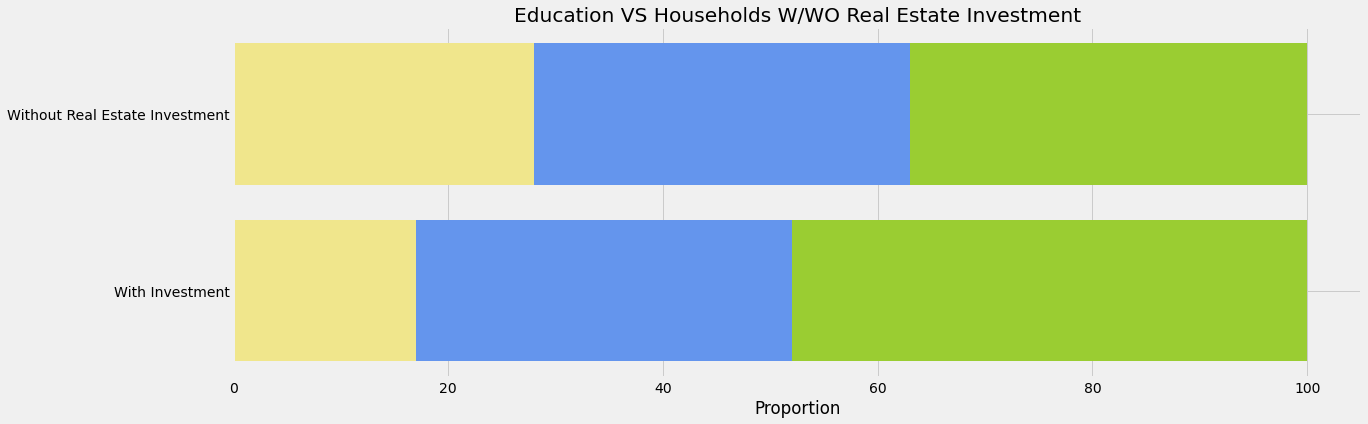

<Figure size 1296x432 with 0 Axes>

In [39]:
plt.figure(figsize=(18,6))
plt.title('Education VS Households W/WO Real Estate Investment')
b1 = plt.barh(y, below_ba, color='khaki')

b2 = plt.barh(y, ba, left=below_ba, color='cornflowerblue')

b3 = plt.barh(y, msphd, left=xxxba, color='yellowgreen')
# plt.ylabel('Households')
plt.xlabel('Proportion')
# plt.legend([b1, b2, b3], ["Below Bechalor", "Bachelor", "Master and PhD"], title="Education Level", loc=2)
plt.figure(figsize=(18,6))
plt.show()

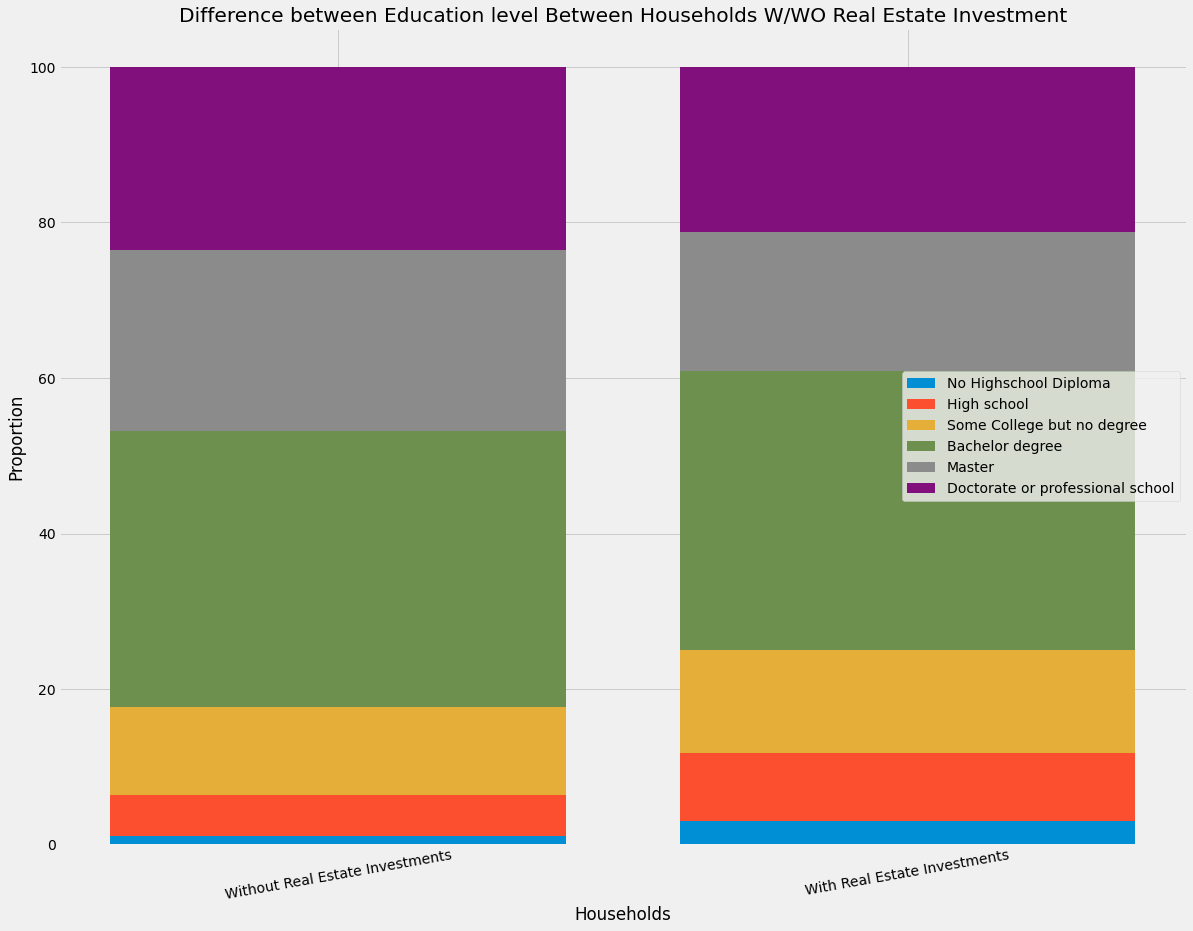

In [40]:
plt.figure(figsize=(18,14))
plt.title('Difference between Education level Between Households W/WO Real Estate Investment')
plt.xlabel('Households')
plt.ylabel('Proportion')
plt.bar(x, y1)
plt.bar(x, y2, bottom=y1)
plt.bar(x, y3, bottom=y1+y2)
plt.bar(x, y4, bottom=y1+y2+y3)
plt.bar(x, y5, bottom=y1+y2+y3+y4)
plt.bar(x, y6, bottom=y1+y2+y3+y4+y5)
plt.ylim=([0,130])
plt.legend(['No Highschool Diploma', 'High school', 'Some College but no degree', 'Bachelor degree',
             'Master', 'Doctorate or professional school'],loc=5)
plt.xticks(rotation=10, horizontalalignment="center")
plt.show()

In [67]:
df_age = df_1.groupby('AGECL').WGT.sum()
df_age

AGECL
1    2.195667e+05
2    1.055030e+06
3    2.852305e+06
4    3.866325e+06
5    2.774036e+06
6    1.335587e+06
Name: WGT, dtype: float64

In [73]:
(df_age[1]+df_age[2]+df_age[3])/df_age.sum()

0.34098593618799194

In [74]:
(df_age[4]+df_age[5])/df_age.sum()

0.5486609637676556

In [72]:
(df_age[6])/df_age.sum()

0.1103531000443524

In [92]:
x = ['Without Real Estate Investments', 'With Real Estate Investments']
y1 = np.array([2.59,0.66])
y2 = np.array([9.37,7.76])
y3 = np.array([23.49,23.69])
y4 = np.array([30.89,33.51])
y5 = np.array([21.98,24.31])
y6 = np.array([11.68,10.07])

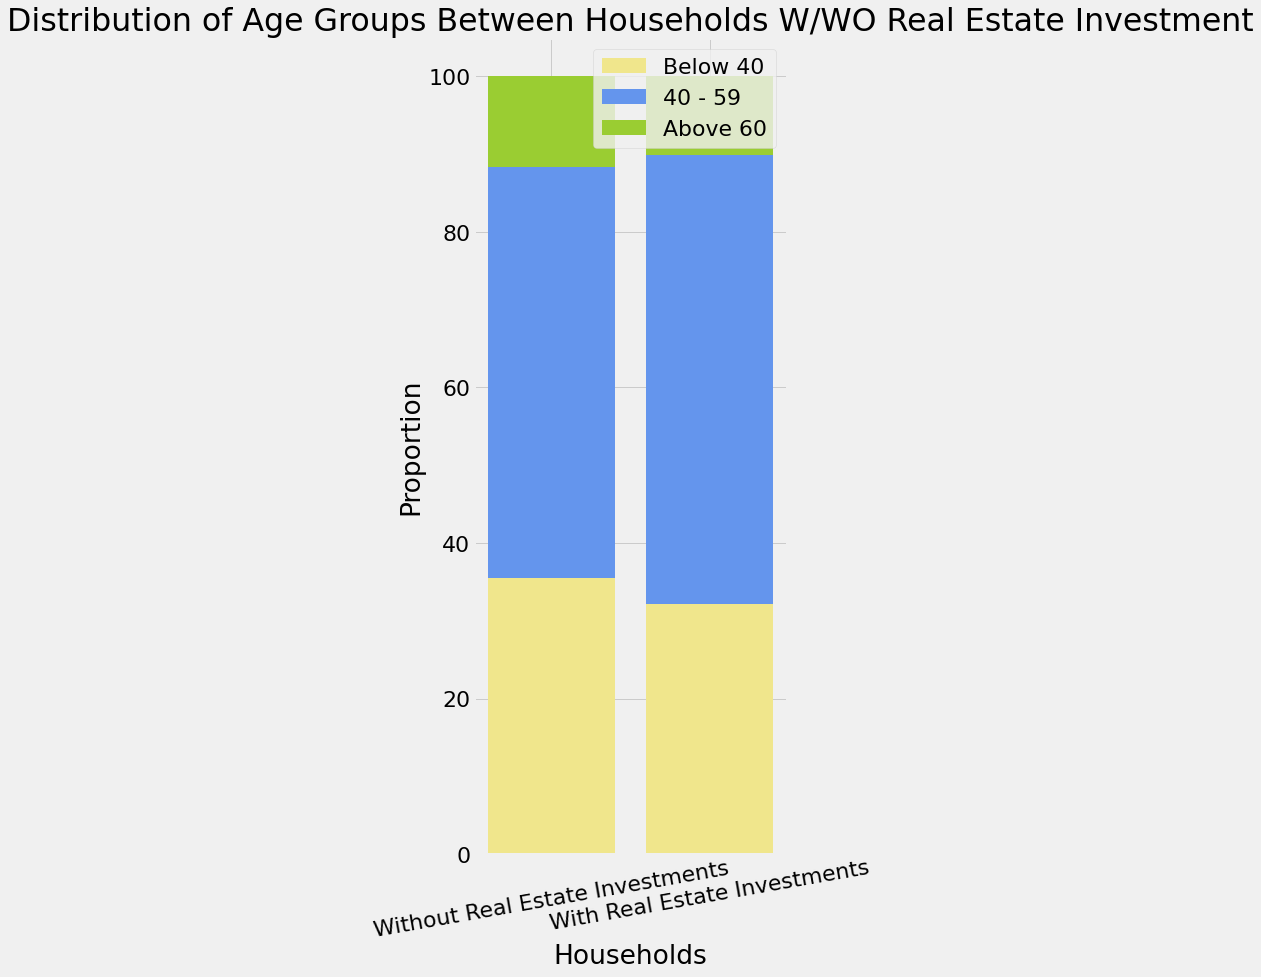

In [93]:
plt.figure(figsize=(5,14))
plt.title('Distribution of Age Groups Between Households W/WO Real Estate Investment')
plt.xlabel('Households')
plt.ylabel('Proportion')
plt.bar(x, y1+y2+y3, color='khaki')
plt.bar(x, y4+y5, bottom=y1+y2+y3, color='cornflowerblue')
plt.bar(x, y6, bottom=y1+y2+y3+y4+y5, color='yellowgreen')

plt.legend(["Below 40",  "40 - 59", 'Above 60'])
plt.xticks(rotation=10, horizontalalignment="center")
plt.show()

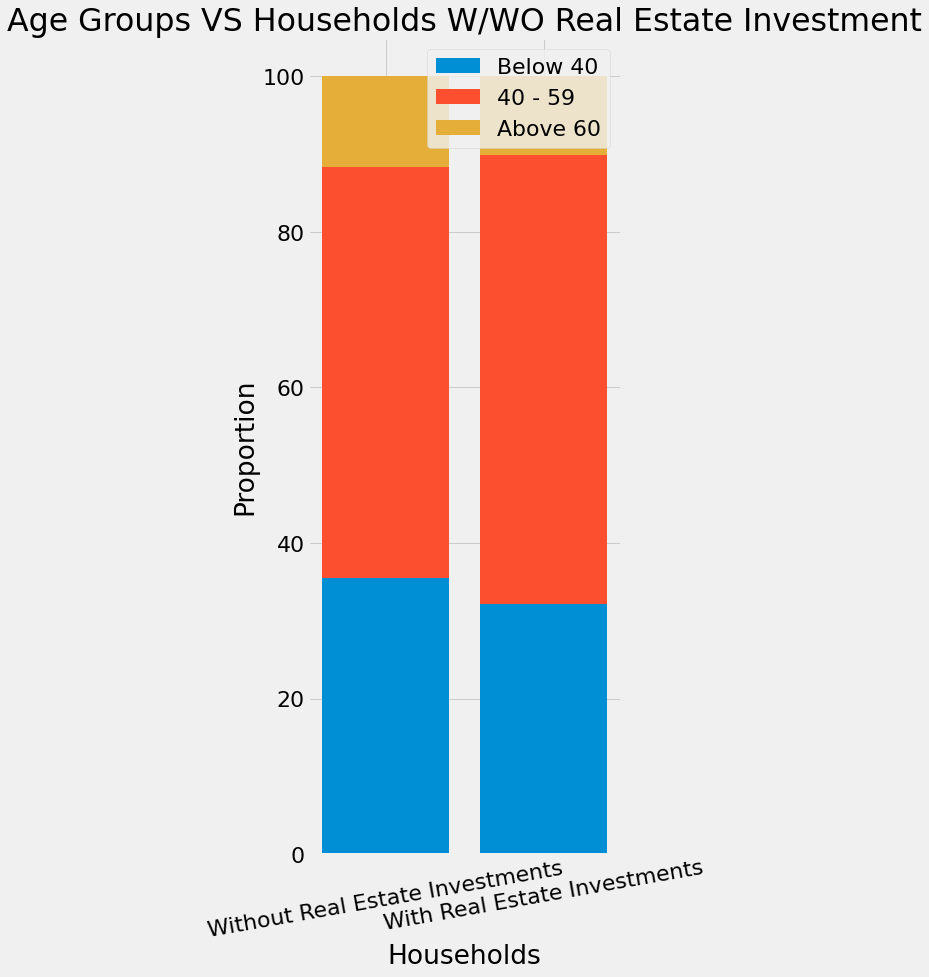

In [94]:
plt.figure(figsize=(5,14))
plt.title('Age Groups VS Households W/WO Real Estate Investment')
plt.xlabel('Households')
plt.ylabel('Proportion')
plt.bar(x, y1+y2+y3)
plt.bar(x, y4+y5, bottom=y1+y2+y3)
plt.bar(x, y6, bottom=y1+y2+y3+y4+y5)

plt.legend(["Below 40",  "40 - 59", 'Above 60'])
plt.xticks(rotation=10, horizontalalignment="center")
plt.show()

In [95]:
y=['With Real Estate Investment', 'Without Real Estate Investment']
below_30 = [38, 28]
xxxx = [50, 62]
xxx = [88,90]
xxxxx = [12,10]

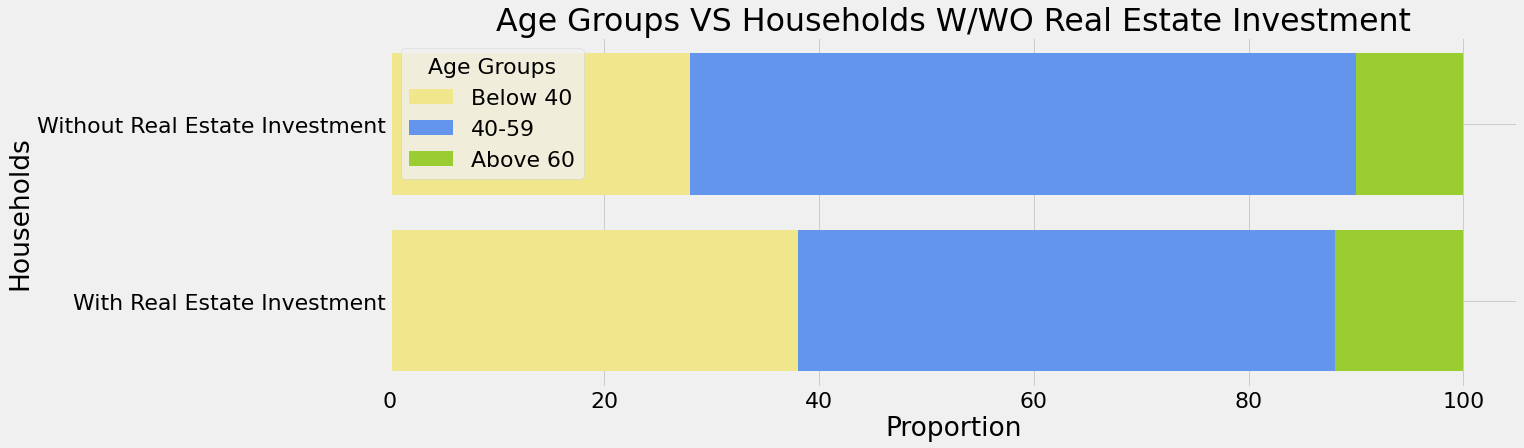

<Figure size 1296x432 with 0 Axes>

In [96]:
plt.figure(figsize=(18,6))
plt.title('Age Groups VS Households W/WO Real Estate Investment')
b1 = plt.barh(y, below_30, color='khaki')

b2 = plt.barh(y, xxxx, left=below_30, color='cornflowerblue')

b3 = plt.barh(y, xxxxx, left=xxx, color='yellowgreen')
plt.ylabel('Households')
plt.xlabel('Proportion')
plt.legend([b1, b2, b3], ["Below 40", "40-59", "Above 60"], title="Age Groups", loc=2)
plt.figure(figsize=(18,6))
plt.show()

In [75]:
df_mar_10 = df10.groupby('marriage_clean')['WGT'].sum()
df_mar_11 = df11.groupby('marriage_clean')['WGT'].sum()
df_mar = pd.merge(df_mar_10, df_mar_11,  how='inner', 
                       on = 'marriage_clean')
df_mar.WGT_x = round((df_mar.WGT_x/(df_mar.WGT_x.sum()))*100,2)
df_mar.WGT_y = round((df_mar.WGT_y/(df_mar.WGT_y.sum()))*100,2)
df_mar.rename(columns={"marriage_clean": "Marriage Status", "WGT_x":"Households Without Real Estate Investments",
                  "WGT_y":"Households With Real Estate Investments"},inplace=True)

df_mar

Households Without Real Estate Investments  \
marriage_clean                                               
0                                                     4.67   
1                                                     9.56   
2                                                    85.78   

                Households With Real Estate Investments  
marriage_clean                                           
0                                                  4.04  
1                                                  7.31  
2                                                 88.65

In [131]:
df_mar = df_mar.rename(index={0: 'Unmarried Female', 1:'Unmarried Male', 2:'Married Heterosexual Couple'})

(array([0, 1, 2]),
 [Text(0, 0, 'Unmarried Female'),
  Text(1, 0, 'Unmarried Male'),
  Text(2, 0, 'Married Heterosexual Couple')])

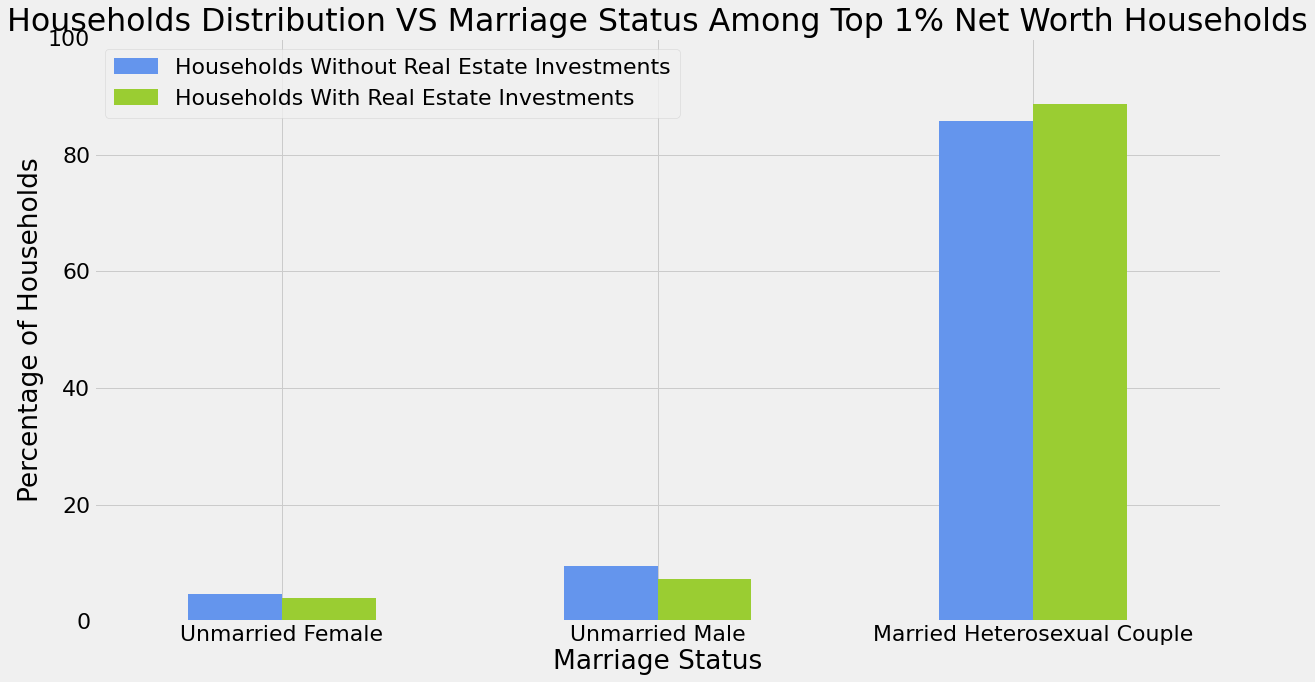

In [139]:
matplotlib.style.use('fivethirtyeight')
matplotlib.rcParams.update({'font.size': 22})
df_mar.plot(kind='bar',title='Households Distribution VS Marriage Status Among Top 1% Net Worth Households',
             figsize=(18,10),xlabel='Marriage Status',ylabel="Percentage of Households",
            color=['cornflowerblue','yellowgreen']).set_ylim(0, 100)
# plt.ylim([0,110])
plt.xticks(rotation=0, horizontalalignment="center")

In [97]:
df_mar_10 = df10.groupby('marriage_clean')['WGT'].sum()
df_mar_11 = df11.groupby('marriage_clean')['WGT'].sum()
df_mar = pd.merge(df_mar_10, df_mar_11,  how='inner',
                       on = 'marriage_clean')
df_mar.WGT_x = round((df_mar.WGT_x/(df_mar.WGT_x.sum()))*100,2)
df_mar.WGT_y = round((df_mar.WGT_y/(df_mar.WGT_y.sum()))*100,2)
df_mar.rename(columns={"marriage_clean": "Marriage Status", "WGT_x":"Households Without Real Estate Investments",
                  "WGT_y":"Households With Real Estate Investments"},inplace=True)

df_mar

Households Without Real Estate Investments  \
marriage_clean                                               
0                                                     4.67   
1                                                     9.56   
2                                                    85.78   

                Households With Real Estate Investments  
marriage_clean                                           
0                                                  4.04  
1                                                  7.31  
2                                                 88.65

In [98]:
df_race_edu_10 = df10.groupby(['EDUC_CLEAN','RACECL4'])['WGT'].sum()
df_race_edu_11 = df11.groupby(['EDUC_CLEAN','RACECL4'])['WGT'].sum()
df_race_edu = pd.merge(df_race_edu_10, df_race_edu_11, 
                       on = ['EDUC_CLEAN','RACECL4'])
df_race_edu = df_race_edu.rename(index={4: 'Other', 1:'White, non-mixed race', 
                              2:'Black/African-American, non-mixed race',3:'Hispanic/Latino, non-mixed race'})

In [99]:
df_race_edu_10.index

MultiIndex([(                 'Bachelor degree', 1),
            (                 'Bachelor degree', 2),
            (                 'Bachelor degree', 3),
            (                 'Bachelor degree', 4),
            ('Doctorate or professional school', 1),
            ('Doctorate or professional school', 2),
            ('Doctorate or professional school', 3),
            ('Doctorate or professional school', 4),
            (                     'High school', 1),
            (                     'High school', 2),
            (                     'High school', 3),
            (                     'High school', 4),
            (                          'Master', 1),
            (                          'Master', 2),
            (                          'Master', 3),
            (                          'Master', 4),
            (           'No Highschool Diploma', 1),
            (           'No Highschool Diploma', 3),
            (           'No Highschool Diploma

In [100]:
df_race_edu_10 = df_race_edu_10.rename(index={4: 'Other', 1:'White, non-mixed race', 
                              2:'Black/African-American, non-mixed race',3:'Hispanic/Latino, non-mixed race'})
df_race_edu_11 = df_race_edu_11.rename(index={4: 'Other', 1:'White, non-mixed race', 
                              2:'Black/African-American, non-mixed race',3:'Hispanic/Latino, non-mixed race'})

In [101]:
df_race_edu_10 = round((df_race_edu_10/(df_race_edu_10.sum()))*100,2)
df_race_edu_11= round((df_race_edu_11/(df_race_edu_11.sum()))*100,2)
df_race_edu_10


EDUC_CLEAN                        RACECL4                               
Bachelor degree                   White, non-mixed race                     32.86
                                  Black/African-American, non-mixed race     0.44
                                  Hispanic/Latino, non-mixed race            0.23
                                  Other                                      1.95
Doctorate or professional school  White, non-mixed race                     21.91
                                  Black/African-American, non-mixed race     0.09
                                  Hispanic/Latino, non-mixed race            0.32
                                  Other                                      1.23
High school                       White, non-mixed race                      5.15
                                  Black/African-American, non-mixed race     0.00
                                  Hispanic/Latino, non-mixed race            0.00
                         

TypeError: 'list' object is not callable

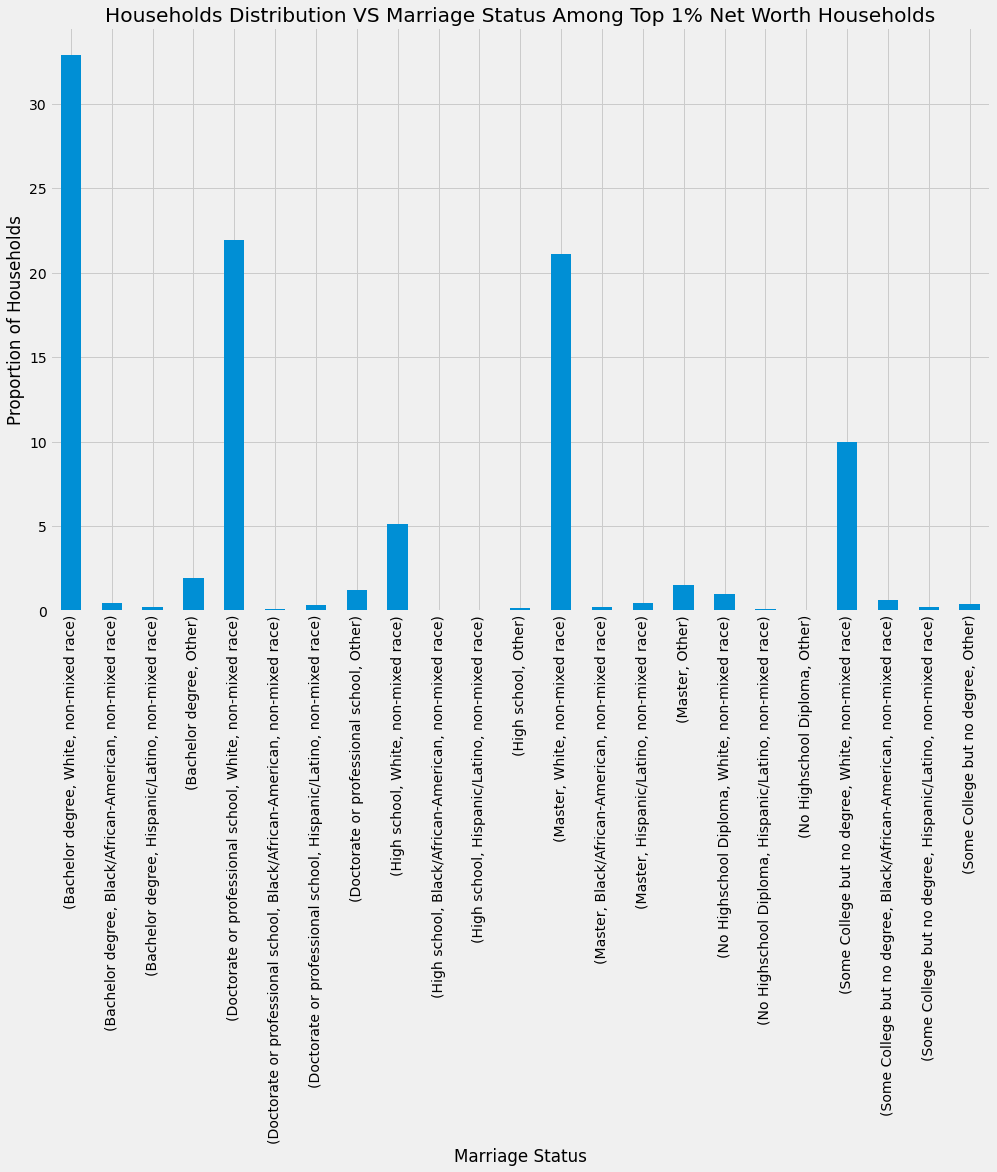

In [102]:
matplotlib.style.use('fivethirtyeight')
df_race_edu_10.plot(kind='bar',title='Households Distribution VS Marriage Status Among Top 1% Net Worth Households',
             figsize=(15,10),xlabel='Marriage Status',ylabel="Proportion of Households")
plt.ylim([0,40])
plt.xticks(rotation=30, horizontalalignment="center")

In [ ]:
matplotlib.style.use('fivethirtyeight')
df_race_edu.plot(kind='bar',title='Households Distribution VS Marriage Status Among Top 1% Net Worth Households',
             figsize=(15,10),xlabel='Marriage Status',ylabel="Proportion of Households")
plt.ylim([0,40])
plt.xticks(rotation=30, horizontalalignment="center")

In [ ]:
df_race_edu.WGT_x = round((df_race_edu.WGT_x/(df_race_edu.WGT_x.sum()))*100,2)
df_race_edu.WGT_y = round((df_race_edu.WGT_y/(df_race_edu.WGT_y.sum()))*100,2)
df_race_edu

In [ ]:
matplotlib.style.use('fivethirtyeight')
df_race_edu.plot(kind='bar',title='Households Distribution VS Marriage Status Among Top 1% Net Worth Households',
             figsize=(15,10),xlabel='Marriage Status',ylabel="Proportion of Households")
plt.ylim([0,40])
plt.xticks(rotation=30, horizontalalignment="center")

In [76]:
df.RACECL4.value_counts()

1    199849
2     27859
4     19175
3     18977
Name: RACECL4, dtype: int64

In [103]:
df_race_10 = df10.groupby('RACECL4')['WGT'].sum()
df_race_11 = df11.groupby('RACECL4')['WGT'].sum()
df_race = pd.merge(df_race_10, df_race_11,  how='inner', 
                       on = 'RACECL4')
df_race.WGT_x = round((df_race.WGT_x/df_race.WGT_x.sum())*100,2)
df_race.WGT_y = round((df_race.WGT_y/df_race.WGT_y.sum())*100,2)
df_race.rename(columns={"WGT_x":"Households Without Real Estate Investments",
                  "WGT_y":"Households With Real Estate Investments"},inplace=True)

df_race

Households Without Real Estate Investments  \
RACECL4                                               
1                                             91.97   
2                                              1.40   
3                                              1.33   
4                                              5.30   

         Households With Real Estate Investments  
RACECL4                                           
1                                          92.86  
2                                           0.92  
3                                           1.31  
4                                           4.91

In [104]:
df_race = df_race.rename(index={4: 'Other', 1:'White, non-mixed race', 
                              2:'Black/African-American, non-mixed race',3:'Hispanic/Latino, non-mixed race'})

In [105]:
1	White, non-mixed race
10.5	28,024	2	Black/African-American, non-mixed race
7.1	19,092	3	Hispanic/Latino, non-mixed race
7.2	19,368	4	Other

SyntaxError: invalid syntax (194237071.py, line 1)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'White, non-mixed race'),
  Text(1, 0, 'Black/African-American, non-mixed race'),
  Text(2, 0, 'Hispanic/Latino, non-mixed race'),
  Text(3, 0, 'Other')])

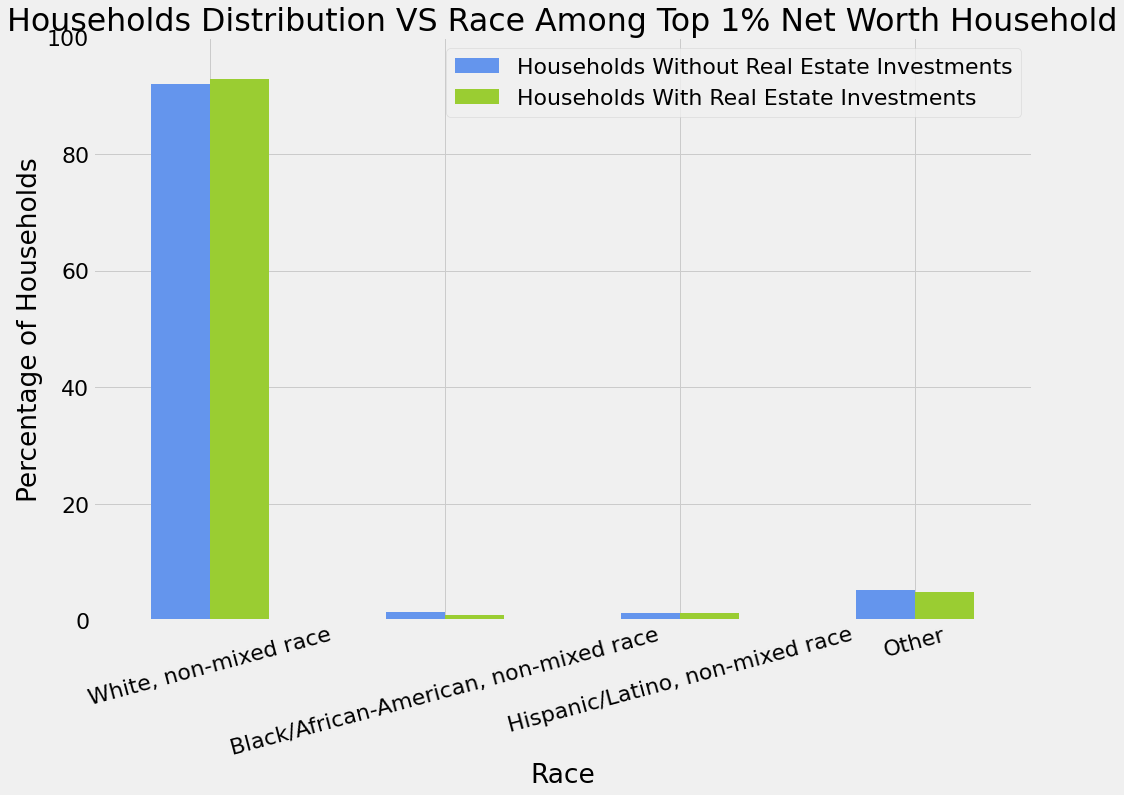

In [141]:

matplotlib.style.use('fivethirtyeight')
matplotlib.rcParams.update({'font.size': 22})
df_race.plot(kind='bar',title='Households Distribution VS Race Among Top 1% Net Worth Household',
             figsize=(15,10),xlabel='Race',ylabel="Percentage of Households",
             color=['cornflowerblue','yellowgreen']).set_ylim(0, 100)

plt.xticks(rotation=15, horizontalalignment="center")

In [111]:
df_age_10 = df10.groupby('AGECL')['WGT'].sum()
df_age_11 = df11.groupby('AGECL')['WGT'].sum()
df_age = pd.merge(df_age_10, df_age_11,  how='inner', 
                       on = 'AGECL')
df_age.WGT_x = round((df_age.WGT_x/df_age.WGT_x.sum())*100,2)
df_age.WGT_y = round((df_age.WGT_y/df_age.WGT_y.sum())*100,2)
df_age.rename(columns={"WGT_x":"Households Without Real Estate Investments",
                  "WGT_y":"Households With Real Estate Investments"},inplace=True)

df_age

Households Without Real Estate Investments  \
AGECL                                               
1                                            2.59   
2                                            9.37   
3                                           23.49   
4                                           30.89   
5                                           21.98   
6                                           11.68   

       Households With Real Estate Investments  
AGECL                                           
1                                         0.66  
2                                         7.76  
3                                        23.69  
4                                        33.51  
5                                        24.31  
6                                        10.07

In [112]:
df_age = df_age.rename(index={1: 'Below 20', 2:'20-29', 3:'30-39',
                             4:'40-49',5:'50-59',6:'Above 60'})

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Below 20'),
  Text(1, 0, '20-29'),
  Text(2, 0, '30-39'),
  Text(3, 0, '40-49'),
  Text(4, 0, '50-59'),
  Text(5, 0, 'Above 60')])

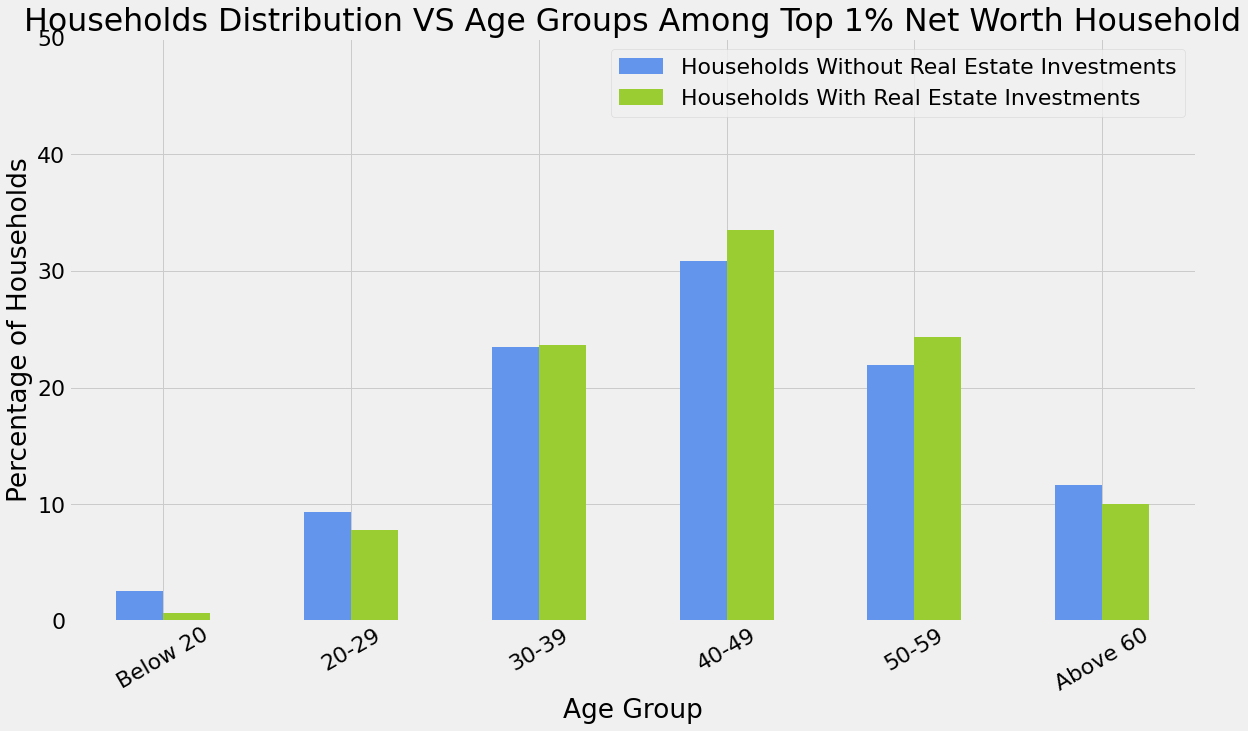

In [142]:
matplotlib.style.use('fivethirtyeight')
matplotlib.rcParams.update({'font.size': 22})

df_age.plot(kind='bar',title='Households Distribution VS Age Groups Among Top 1% Net Worth Household',
             figsize=(18,10),xlabel='Age Group',ylabel="Percentage of Households",
            color=['cornflowerblue','yellowgreen']).set_ylim(0, 50)
# plt.ylim([0,50])

# plt.legend(["Households With Real Estate Investment", "Households Without Real Estate Investment"])
plt.xticks(rotation=30, horizontalalignment="center")

In [ ]:
df_1_below_30 = df_1[df_1.AGECL<3]
df_1_30_39 = df_1[df_1.AGECL==3]
df_1_above_40 = df_1[df_1.AGECL>3]

In [ ]:
ws.numpy_weighted_mean(df_1_below_30.NNRESRE, 
                         weights=df_1_below_30.WGT)

In [ ]:
ws.numpy_weighted_mean(df_1_30_39.NNRESRE, 
                         weights=df_1_30_39.WGT)

In [ ]:
ws.numpy_weighted_mean(df_1_above_40.NNRESRE, 
                         weights=df_1_above_40.WGT)

In [ ]:
ws.numpy_weighted_mean(df_1[df_1.AGECL==1].NNRESRE, weights=df_1[df_1.AGECL==1].WGT)



In [ ]:
ws.numpy_weighted_mean(df_1[df_1.AGECL==2].NNRESRE, weights=df_1[df_1.AGECL==2].WGT)

In [ ]:
ws.numpy_weighted_mean(df_1[df_1.AGECL==3].NNRESRE, weights=df_1[df_1.AGECL==3].WGT)

In [ ]:
ws.numpy_weighted_mean(df_1[df_1.AGECL==4].NNRESRE, weights=df_1[df_1.AGECL==4].WGT)

In [ ]:
ws.numpy_weighted_mean(df_1[df_1.AGECL==5].NNRESRE, weights=df_1[df_1.AGECL==5].WGT)

In [ ]:
ws.numpy_weighted_mean(df_1[df_1.AGECL==6].NNRESRE, weights=df_1[df_1.AGECL==6].WGT)

In [126]:
data = {'Age Group': ['Below 20','20-29','30-39','40-49','50-59','Above 60'], 
        'Weighted Mean of Investment Real Estate Equity': 
        [ws.numpy_weighted_mean(df_1[df_1.AGECL==1].NNRESRE, weights=df_1[df_1.AGECL==1].WGT),
        ws.numpy_weighted_mean(df_1[df_1.AGECL==2].NNRESRE, weights=df_1[df_1.AGECL==2].WGT),
        ws.numpy_weighted_mean(df_1[df_1.AGECL==3].NNRESRE, weights=df_1[df_1.AGECL==3].WGT),
        ws.numpy_weighted_mean(df_1[df_1.AGECL==4].NNRESRE, weights=df_1[df_1.AGECL==4].WGT),
        ws.numpy_weighted_mean(df_1[df_1.AGECL==5].NNRESRE, weights=df_1[df_1.AGECL==5].WGT),
        ws.numpy_weighted_mean(df_1[df_1.AGECL==6].NNRESRE, weights=df_1[df_1.AGECL==6].WGT)]}  
  
# Create DataFrame  
df_age_equity = pd.DataFrame(data,index =['Below 20','20-29','30-39','40-49','50-59','Above 60'])  

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Below 20'),
  Text(1, 0, '20-29'),
  Text(2, 0, '30-39'),
  Text(3, 0, '40-49'),
  Text(4, 0, '50-59'),
  Text(5, 0, 'Above 60')])

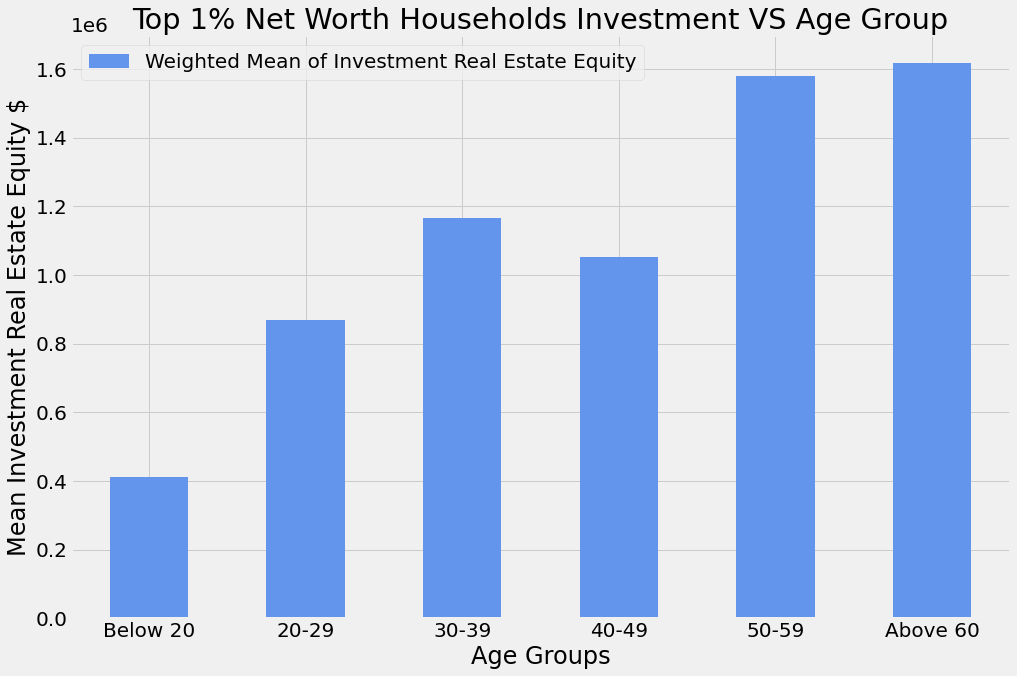

In [127]:
plt.rcParams['font.size'] = 20
df_age_equity.plot(kind='bar',title='Top 1% Net Worth Households Investment VS Age Group',
             figsize=(15,10), color='cornflowerblue')
plt.xlabel('Age Groups')
plt.ylabel("Mean Investment Real Estate Equity $")
plt.xticks(rotation=0, horizontalalignment="center")

In [128]:
df_1.EDUC_CLEAN.value_counts()


Bachelor degree                     12718
Master                               8421
Doctorate or professional school     7252
Some College but no degree           3885
High school                          2307
No Highschool Diploma                 778
Name: EDUC_CLEAN, dtype: int64

In [129]:
data = {'Education Level': ['Below Highschool','High school','Some College No degree','Bachelor degree','Master','PhD and Professional'], 
        'Weighted Mean of Investment Real Estate Equity': 
        [ws.numpy_weighted_mean(df_1[df_1.EDUC_CLEAN=='No Highschool Diploma'].NNRESRE, weights=df_1[df_1.EDUC_CLEAN=='No Highschool Diploma'].WGT),
        ws.numpy_weighted_mean(df_1[df_1.EDUC_CLEAN=='High school'].NNRESRE, weights=df_1[df_1.EDUC_CLEAN=='High school'].WGT),
        ws.numpy_weighted_mean(df_1[df_1.EDUC_CLEAN=='Some College but no degree'].NNRESRE, weights=df_1[df_1.EDUC_CLEAN=='Some College but no degree'].WGT),
        ws.numpy_weighted_mean(df_1[df_1.EDUC_CLEAN=='Bachelor degree'].NNRESRE, weights=df_1[df_1.EDUC_CLEAN=='Bachelor degree'].WGT),
        ws.numpy_weighted_mean(df_1[df_1.EDUC_CLEAN=='Master'].NNRESRE, weights=df_1[df_1.EDUC_CLEAN=='Master'].WGT),
        ws.numpy_weighted_mean(df_1[df_1.EDUC_CLEAN=='Doctorate or professional school'].NNRESRE, weights=df_1[df_1.EDUC_CLEAN=='Doctorate or professional school'].WGT)]}  
  
# Create DataFrame  
df_edu_equity = pd.DataFrame(data,index =['Below Highschool','High school','Some College No degree','Bachelor degree','Master','PhD and Professional']) 

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Below Highschool'),
  Text(1, 0, 'High school'),
  Text(2, 0, 'Some College No degree'),
  Text(3, 0, 'Bachelor degree'),
  Text(4, 0, 'Master'),
  Text(5, 0, 'PhD and Professional')])

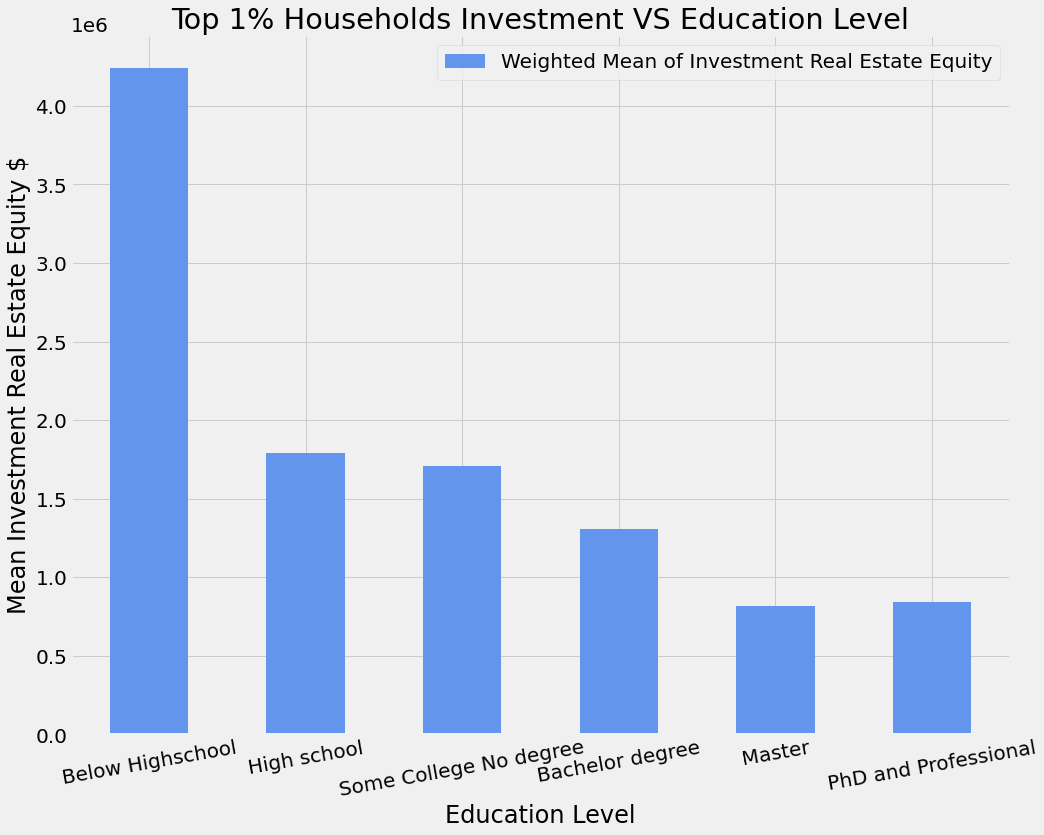

In [130]:
df_edu_equity.plot(kind='bar',title='Top 1% Households Investment VS Education Level',
             figsize=(15,12),xlabel='Education Level',ylabel="Mean Investment Real Estate Equity $", color='cornflowerblue')
plt.ylim=([0,550000])
plt.xticks(rotation=10, horizontalalignment="center")

# Necessity overlapping plot

In [ ]:
df

In [ ]:
df[df.ONE_PERC==1].WGT.sum()

In [ ]:
df[df.resedential_estate_perc==99].WGT.sum()

In [ ]:
df[(df.ONE_PERC==1) & (df.resedential_estate_perc==99)].WGT.sum()

In [ ]:
df[df.resedential_estate_perc==99].total_real_estate.min()

In [ ]:
df[df.investment_estate_equity_perc==98].real_estate_investment.max()

In [ ]:
df[(df.ONE_PERC==1) & (df.resedential_estate_perc==99)].WGT.sum() / df[df.ONE_PERC==1].WGT.sum()

In [ ]:
df[(df.ONE_PERC==1) & (df.investment_estate_equity_perc==99)].WGT.sum() / df[df.ONE_PERC==1].WGT.sum()

In [ ]:
df[(df.ONE_PERC==1) & (df.investment_estate_perc==99)].WGT.sum() / df[df.ONE_PERC==1].WGT.sum()

In [ ]:
data = {'': ['Top 1% in Residential Real Estates', 
                                                           'Top 1% in Investment Real Estates',
                                                          'Top 1% in Recreational Real Estates'], 
        'Ratio of Top 1% net worth household also holds': [df[(df.ONE_PERC==1) & (df.resedential_estate_perc==99)].WGT.sum() / df[df.ONE_PERC==1].WGT.sum(),
               df[(df.ONE_PERC==1) & (df.investment_estate_equity_perc==99)].WGT.sum() / df[df.ONE_PERC==1].WGT.sum(),
               df[(df.ONE_PERC==1) & (df.investment_estate_perc==99)].WGT.sum() / df[df.ONE_PERC==1].WGT.sum()]}  
  
# Create DataFrame  
df_plt = pd.DataFrame(data,index =['Top 1% in Residential Real Estates', 
                                                           'Top 1% in Investment Real Estates',
                                                          'Top 1% in Recreational Real Estates'])  

In [ ]:
df_plt

In [ ]:
df_plt.plot(kind='bar',title='Overlap Between Top 1% Real Estate Investment and Top 1% Net Worth Households',
             figsize=(15,10),xlabel='',ylabel="Ratio")

plt.xticks(rotation=30, horizontalalignment="center")

# models

In [ ]:
df_sub = df[['AGE','EDUC_CLEAN','marriage_clean','KIDS','RACECL4','total_real_estate',
 'resedential_real_estate',
 'own_residential_real_estate',
 'own_investment_real_estate',
 'real_estate_investment',
 'resedential_estate_perc',
 'investment_estate_perc',
 'investment_estate_equity_perc','BOND','CASHLI','STOCKS',
 'HSTOCKS',
 'NSTOCKS','year',
 'x103',
 'x8021',
 'x1701',
 'x2001',
 'x2002',
 'x2003',
 'x2004',
 'x2010',
 'x2005',
 'x2006',
 'x2007',
 'x2008',
 'x2012',
 'x2013',
 'x2015',
 'x2016',
 'x2017',
 'x2018']]

In [ ]:
df.columns.to_list()

In [ ]:
df_sub

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import OneHotEncoder

In [ ]:
y = df.ONE_PERC
X = df_sub

In [ ]:
df_sub.dtypes

In [ ]:
df_sub.shape

In [ ]:
X=df_sub
cate_vari = ['EDUC_CLEAN','marriage_clean','RACECL4','own_residential_real_estate','own_investment_real_estate']
for i in cate_vari:
    #train[i]=train[i].astype(str)
    X[i]=pd.Categorical(X[i])

In [ ]:
#one hot encoding for categorical variables
from sklearn.preprocessing import OneHotEncoder

# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')

# passing column (label encoded values)
X_ohe = pd.DataFrame(enc.fit_transform(X[cate_vari]).toarray())
X_ohe.columns = enc.get_feature_names()

# merge with main df bridge_df on key values
X = X.join(X_ohe)

# drop other columns
X.drop(columns=cate_vari, inplace=True)

In [ ]:
X.shape

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [ ]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)


In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error

In [ ]:
# calc metrics
y_pred_train = rf.predict(X_train)
y_pred = rf.predict(X_test)

acc_train = rf.score(X_train, y_train)
acc = rf.score(X_test, y_test)

rmse_train = mean_squared_error(np.exp(y_train), np.exp(y_pred_train), squared=False)
rmse = mean_squared_error(np.exp(y_test), np.exp(y_pred), squared=False)

mae_train = mean_absolute_error(np.exp(y_train), np.exp(y_pred_train))
mae = mean_absolute_error(np.exp(y_test), np.exp(y_pred))

medae_train = median_absolute_error(np.exp(y_train), np.exp(y_pred_train))
medae = median_absolute_error(np.exp(y_test), np.exp(y_pred))

In [ ]:
print('R^2 (Train):', round(acc_train,2)) 
print('R^2 (test):', round(acc,2))
print('')
print('RMSE (Train):', round(rmse_train,2))
print('RMSE (test):', round(rmse,2))
print('')
print('Mean Abs Error (Train):', round(mae_train,2))
print('Mean Abs Error (test):', round(mae,2))
print('')
print('Median Absolute Error (Train):', round(medae_train,2))
print('Median Absolute Error (test):', round(medae,2))

In [ ]:
importance = rf.feature_importances_

cols = list(X.columns)
imp_list = []

# summarize feature importance
for i,v in enumerate(importance):
    imp_list.append(v)
    
feature_imp = pd.DataFrame()
feature_imp['Feature'] = cols
feature_imp['Importance'] = imp_list
top5 = feature_imp.sort_values(by='Importance', ascending=False).head(5).reset_index(drop=True)
top10 = feature_imp.sort_values(by='Importance', ascending=False).head(10).reset_index(drop=True)

In [ ]:
# plot feature importance
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)
plt.figure(figsize=(15,10))
plt.bar('Feature', 'Importance', data=top5)
plt.xticks(rotation = 45)

plt.title('Top 5 Important Features (Impurity-Based)', fontsize=15)
plt.ylabel('Importance Score', fontsize=13)
plt.xlabel('Features', fontsize=13)
plt.show()

In [ ]:
# plot feature importance
plt.figure(figsize=(15,10))
plt.bar('Feature', 'Importance', data=top10)
plt.xticks(rotation = 40)

plt.title('Top 10 Important Features (Impurity-Based)', fontsize=15)
plt.ylabel('Importance Score', fontsize=13)
plt.xlabel('Features', fontsize=13)
plt.show()


In [ ]:
df.NNRESRE

In [ ]:
plt.figure(figsize=(12,9))
plt.scatter(df_1.total_real_estate, df_1.NNRESRE, s=df_1.WGT, alpha=0.01)
plt.xlim([0, 10000000])
plt.ylim([0, 10000000])
plt.title('Top 1% Net Worth Households Residential VS Investment Real Estate')
plt.xlabel('Total Residential Real Estate Value')
plt.ylabel('Total Real Estate Investment Equity')

In [ ]:
plt.figure(figsize=(12,9))
plt.scatter(df_1.HOMEEQ, df_1.NNRESRE, s=df_1.WGT,c=df_1.AGECL, alpha=0.05)
plt.xlim([0, 10000000])
plt.ylim([0, 10000000])

m, b = np.polyfit(df_1.HOMEEQ, df_1.NNRESRE, 1)
#add linear regression line to scatterplot 
plt.plot(df_1.HOMEEQ, m*df_1.HOMEEQ+b)

plt.title('Top 1% Net Worth Households Primary Residential VS Investment Real Estate')
plt.xlabel('Primary Residential Real Estate Equity')
plt.ylabel('Total Real Estate Investment Equity')

In [ ]:
plt.figure(figsize=(12,9))
plt.scatter(df_1.HOMEEQ, df_1.NNRESRE, s=df_1.WGT,c=df_1.MARRIED, alpha=0.05)
plt.xlim([0, 10000000])
plt.ylim([0, 10000000])

m, b = np.polyfit(df_1.HOMEEQ, df_1.NNRESRE, 1)
#add linear regression line to scatterplot 
plt.plot(df_1.HOMEEQ, m*df_1.HOMEEQ+b, c='darkkhaki')

plt.title('Top 1% Net Worth Households Primary Residential VS Investment Real Estate')
plt.xlabel('Primary Residential Real Estate Equity')
plt.ylabel('Total Real Estate Investment Equity')

In [ ]:

model = sklearn.linear_model.LinearRegression(fit_intercept=False)
model.fit(df_1.total_real_estate, df_1.NNRESRE, sample_weight=df_1.WGT)

line_x = np.linspace(min(df_1.total_real_estate), max(df_1.total_real_estate), 100).reshape((-1,1))
pred = model.predict(line_x)

plt.scatter(df_1.total_real_estate, df_1.NNRESRE)
plt.plot(line_x, pred)

plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(
    data=df_1,
    x="total_real_estate",
    y="NNRESRE",
    color="k",
    ax=ax,
)
sns.kdeplot(
    data=df_1,
    x="total_real_estate",
    y="NNRESRE",
    levels=5,
    fill=True,
    alpha=0.6,
    cut=2,
    ax=ax,
)